In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_smet(path, var):

    """ Reads a .smet file and returns a time series of the defined variable as a pandas data frame.
    Args:
        path (str): String pointing to the location of the .smet file to be read.
        var  (str): Variable you want to plot
    Returns:
        Time series of defined variable as a pandas data frame.
    """

    # Load .smet file as a Pandas data frame
    df = pd.read_csv(path)

    # Determine indices for data retrieval
    bump = 2

    fields_row = np.where(df[df.columns[0]].str.startswith("fields"))[0][0] + bump

    data_row = np.where(df[df.columns[0]] == '[DATA]')[0][0] + bump

    fields =  np.loadtxt(path, skiprows=fields_row - 1, max_rows=1, dtype='str')

    data_col = np.where(fields == var)[0][0] - bump

    # Creates pandas data frame
    time = np.loadtxt(path, skiprows=data_row, usecols=0, dtype = 'str')

    time = pd.to_datetime(time, format='%Y-%m-%dT%H:%M:%S')

    data = np.loadtxt(path, skiprows=data_row, usecols=data_col)

    ts = pd.DataFrame(data, index=time)

    # Set no data values to nan
    ts[ts == -999] = np.nan

    # Return time series as Pandas data frame
    return ts

def calc_FAC(HS, SWE):
    
    """
    SNOWPACK assumes the density of ice is 917 kg/m^3
    """
    
    SWE_in_units_ice_equivalent = SWE / 0.917
    FAC = HS - SWE_in_units_ice_equivalent
    return FAC

In [3]:
# %%bash
# cd /scratch/summit/erke2265/mass-balance/1_site/output
# cp -- -71.000_136.875_SPINUP.smet tmp.smet

In [4]:
path = "/scratch/summit/erke2265/mass-balance/10_sites/output/-66.500_87.500_SPINUP.smet"
var = ["HS_mod", "SWE"]

HS = read_smet(path, var[0]) / 100 # Units: m
SWE = read_smet(path, var[1]) / 1000 # Units: m
FAC = calc_FAC(HS, SWE)

# Print bulk density at start
bulk_density = SWE[0][0] / HS[0][0] * 1000
print(bulk_density)

# Print bulk density at end
bulk_density = SWE[0][-1] / HS[0][-1] * 1000
print(bulk_density)

771.2052209343045
795.3795967779364


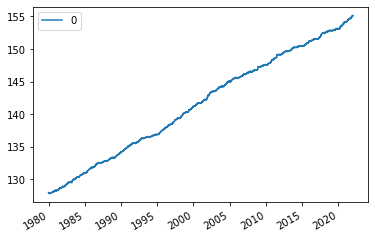

In [5]:
HS.plot()

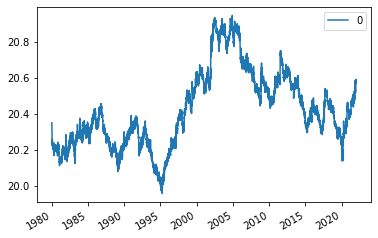

In [6]:
FAC.plot()

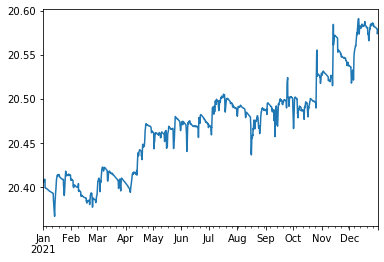

In [7]:
FAC[0][-24*365:].plot()

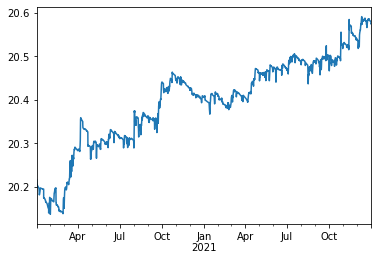

In [8]:
FAC[0][-24*365*2:].plot()

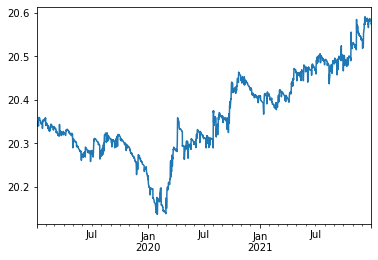

In [9]:
FAC[0][-24*365*3:].plot()